# OCR For Text Detection using Paddleocr

*italicized text*### Installing and importing libraries needed
1. Using yolov11 for OCR Detection and extraction.

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 37.8 MB/s eta 0:00:00


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import Image

Dataset : https://universe.roboflow.com/om-mldcp/flipkartgrid-ocr-tmd6q-lbde9-21opq-s3idj

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nYlhQcXOt3mvr7zv2byS")
project = rf.workspace("flipkartgrid-ejnjo").project("flipkartgrid-ocr")
version = project.version(5)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FlipkartGrid-OCR-5 in yolov11:: 100%|██████████| 3150/3150 [00:02<00:00, 1062.98it/s]


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nYlhQcXOt3mvr7zv2byS")
project = rf.workspace("om-mldcp").project("flipkartgrid-ocr-tmd6q-lbde9-21opq-s3idj")
version = project.version(2)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FlipkartGrid-OCR-2 in yolov11:: 100%|██████████| 2058/2058 [00:02<00:00, 815.38it/s] 


In [ ]:
dataset.location

'/content/FlipkartGrid-OCR-2'

Training on custom Dataset

In [5]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=640

100% 5.35M/5.35M [00:00<00:00, 230MB/s]
Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/FlipkartGrid-OCR-5/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=

Checking results like confusion matrix, f1-scores

In [ ]:
Image("/content/runs/detect/train/confusion_matrix.png")

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

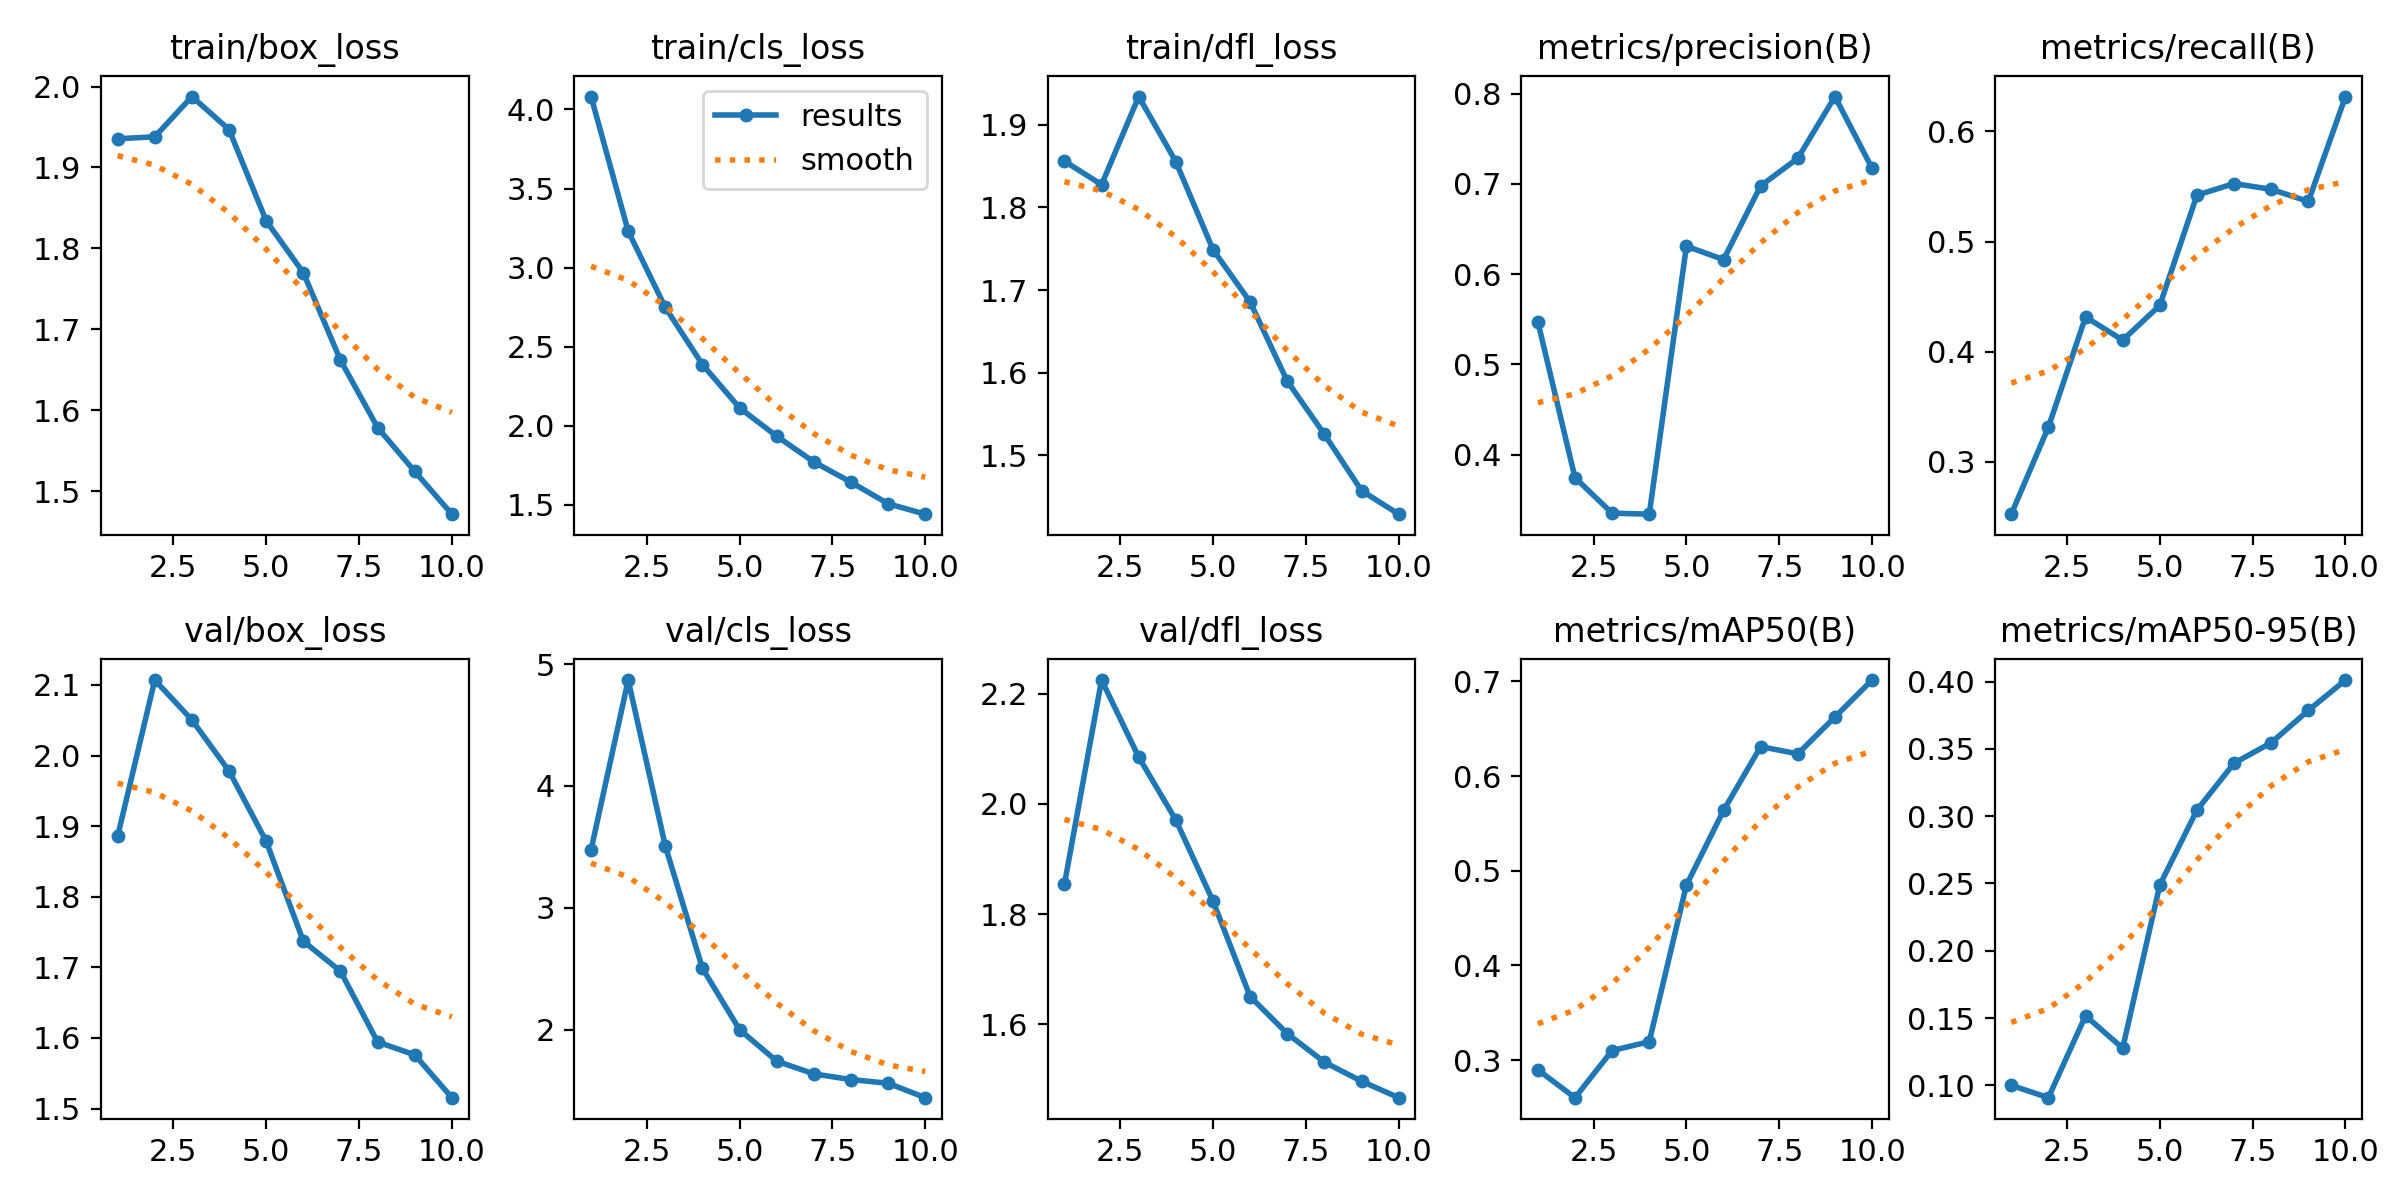

In [6]:
Image("/content/runs/detect/train/results.png", width=600)

Testing

In [7]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/

Ultralytics 8.3.17 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/7 /content/1430_Flipkart_Input_hres_4987176073020_2b620d30_Ecom_2_jpg.rf.db6282ec5bdc4142772d1196fc24d9f8.jpg: 640x480 1 Label, 69.5ms
image 2/7 /content/1436_Flipkart_Input_hres_8906117240761_ddcbf1f1_Ecom_2_jpg.rf.1386aeed83480d7ae528661cc02ebc26.jpg: 640x480 1 Label, 14.0ms
image 3/7 /content/1680_Flipkart_Input_hres_4987176102904_fdb2e106_Ecom_2_jpg.rf.e57d2cefc500547e1c1bb76a3f1015c9.jpg: 640x480 (no detections), 13.0ms
image 4/7 /content/62_Flipkart_Input_hres_8906123550038_81b66f0b_Ecom_2_jpg.rf.40a90c431e813e7e5ea2a7ac5fd7a869.jpg: 640x480 (no detections), 14.8ms
image 5/7 /content/Screenshot 2024-10-19 032007.png: 640x416 1 Label, 74.9ms
image 6/7 /content/Screenshot 2024-10-19 090907.png: 640x640 1 Label, 14.4ms
image 7/7 /content/WhatsApp Image 2024-10-19 at 06.39.16_6445419b.jpg: 640x384 (no detections)

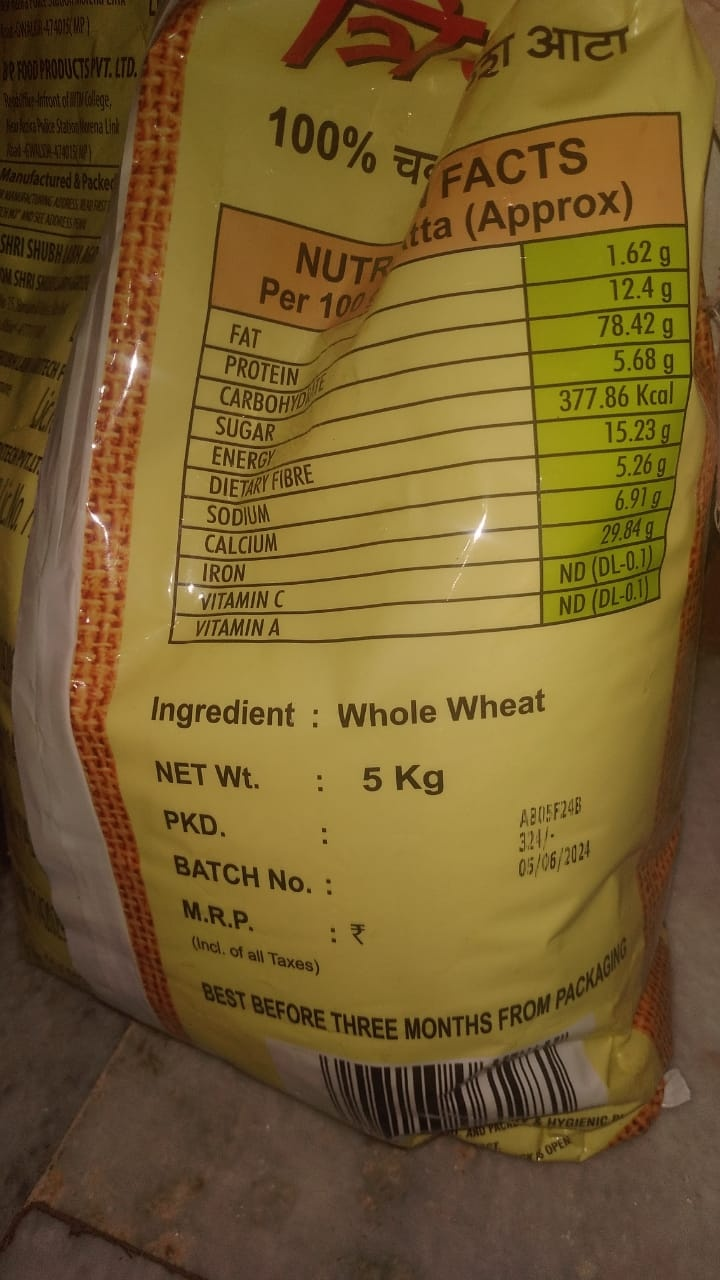

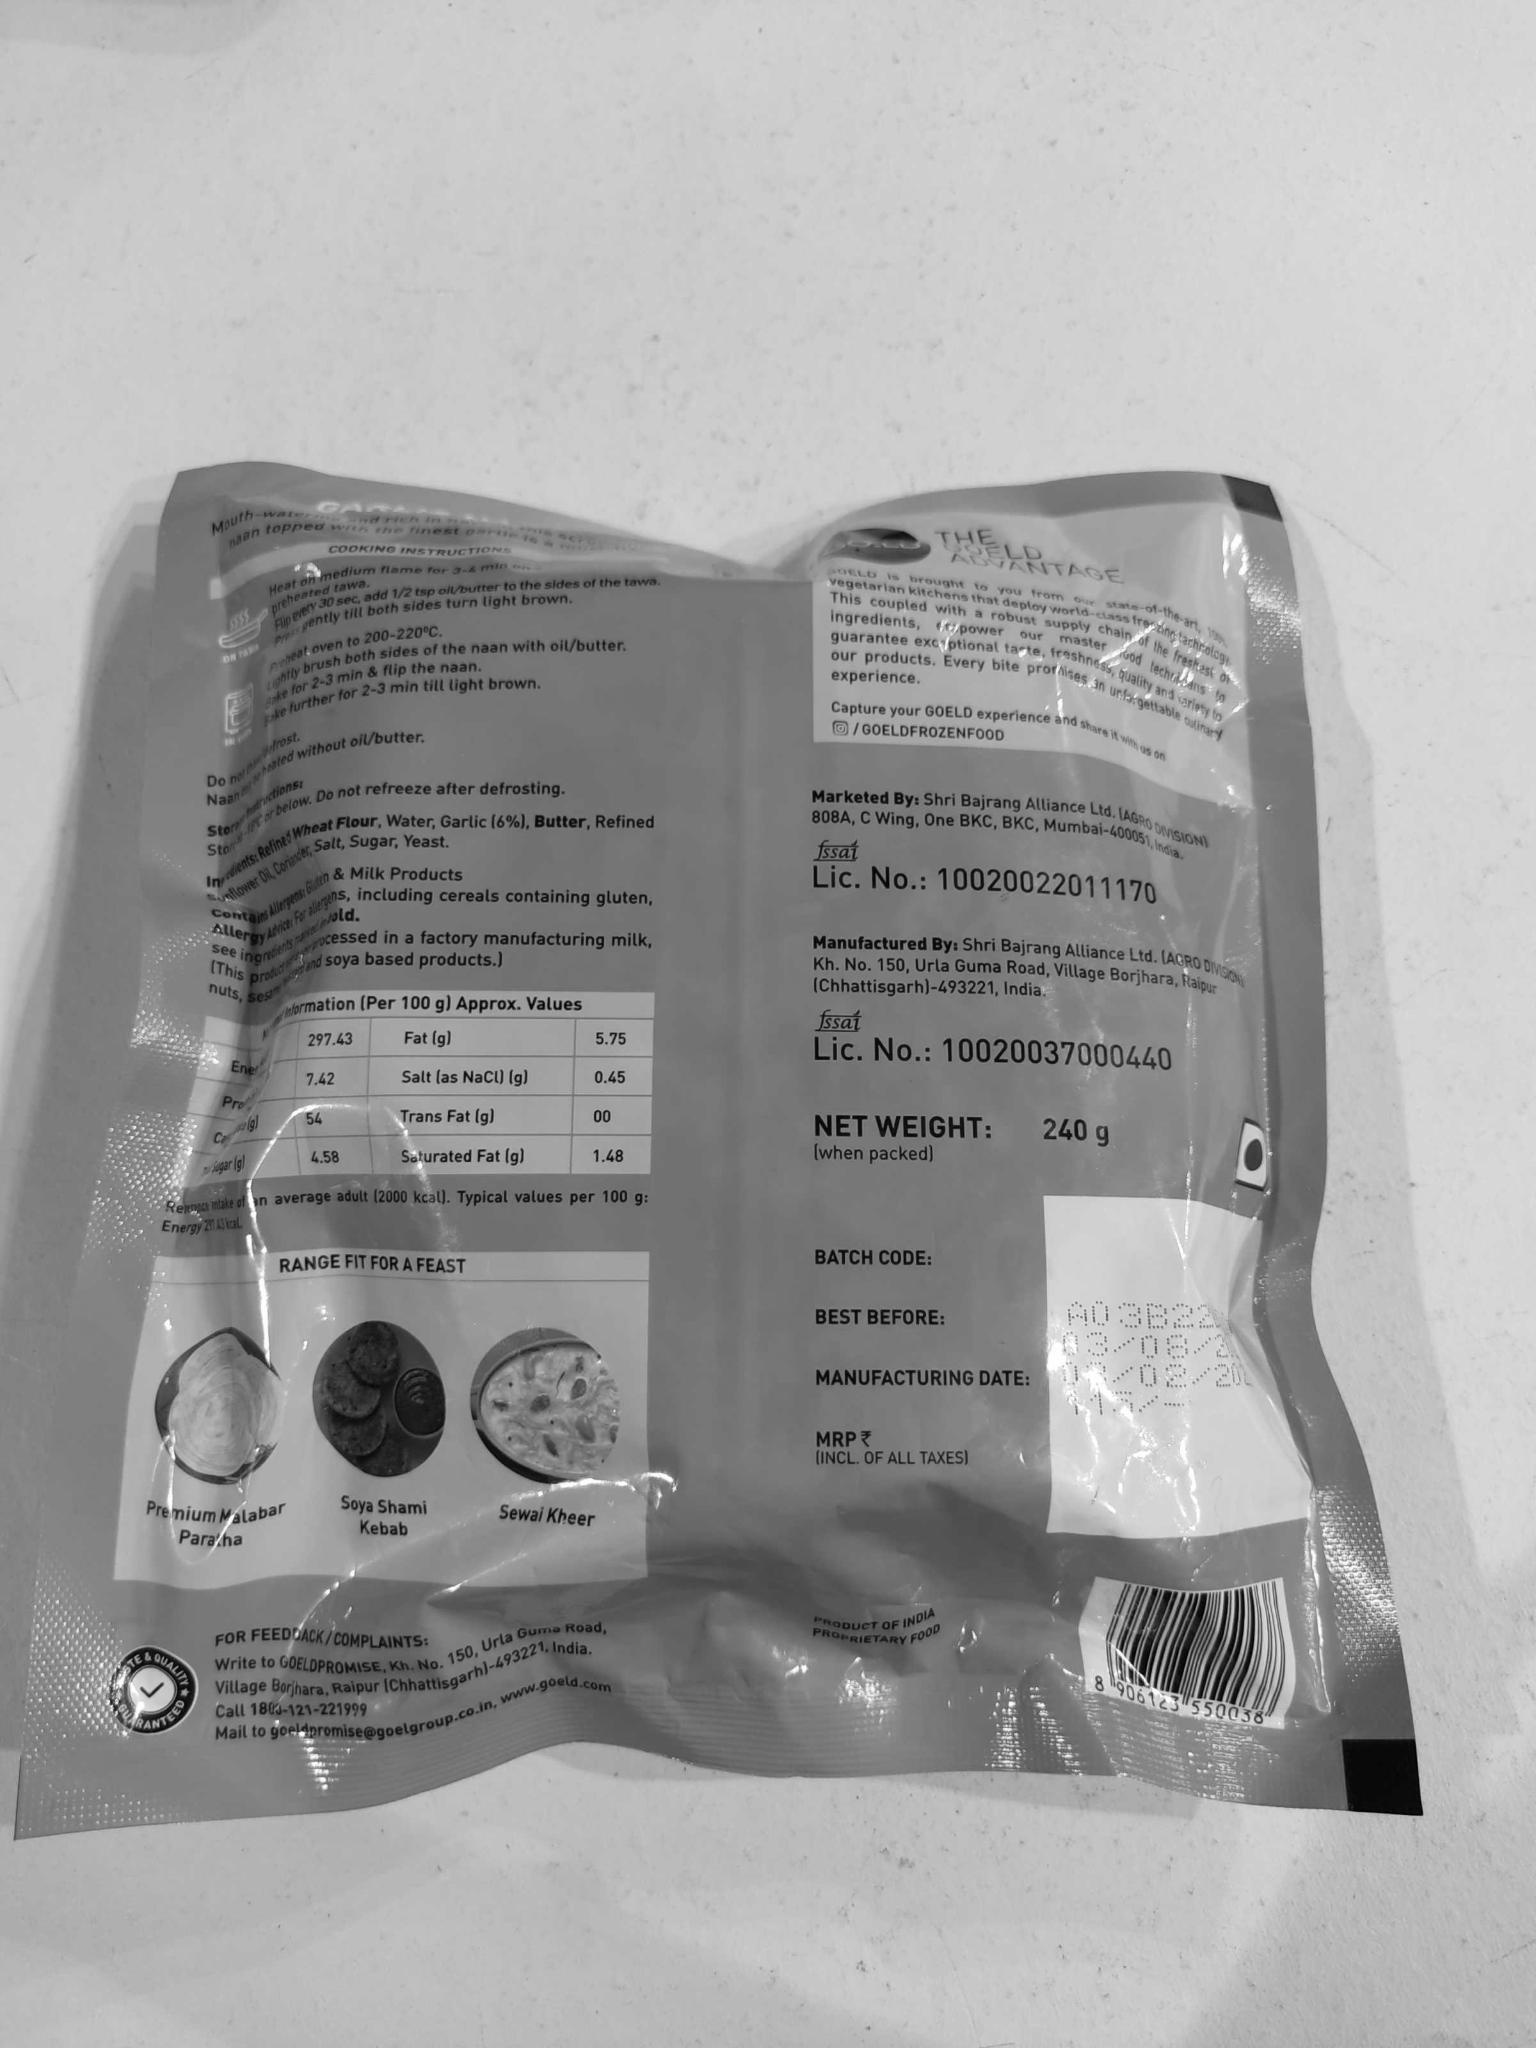

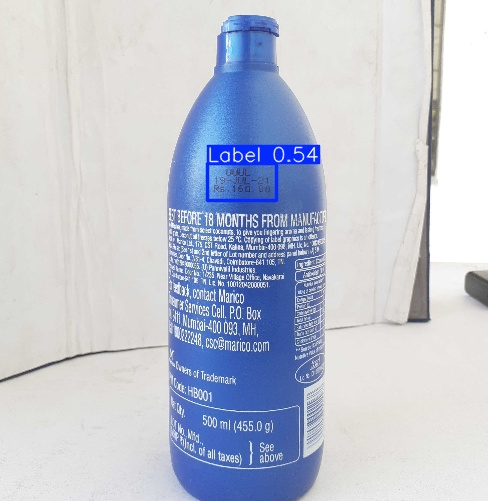

In [8]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")